# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## **1.Load Data**

In [3]:
car_data = pd.read_csv('/content/drive/My Drive/DLAssignments/datasets/CarPrice_Assignment.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )**

In [4]:
np.where(car_data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
car_data['CarName'] = car_data['CarName'].str.replace('audi 100 ls','audi 100ls')
#car_data.iloc[3,2] = 'audi 100ls'

In [7]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
car_data.drop(columns=["car_ID"], inplace=True)

In [9]:
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
final_car_data = pd.get_dummies(car_data, columns=['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], drop_first=True)

In [11]:
final_car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
final_car_data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.107317,0.326829,0.263415,0.156098,0.131707,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.004878,0.004878,0.009756,0.009756,0.009756,0.004878,0.004878,0.009756,0.004878,0.004878,0.004878,0.902439,0.180488,0.439024,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.014634,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.310274,0.470202,0.441564,0.363836,0.339000,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.069843,0.069843,0.098531,0.098531,0.098531,0.069843,0.069843,0.098531,0.069843,0.069843,0.069843,0.297446,0.385535,0.497483,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.120377,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## **3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).**

In [13]:
np.random.seed(11111)
mask = np.random.rand(len(final_car_data)) < 0.75
train_data = final_car_data[mask]
test_data = final_car_data[~mask]

In [14]:
print(len(train_data))
print(len(test_data))

149
56


In [15]:
train_data.dtypes

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 193, dtype: object

In [16]:
train_label = train_data.loc[:,'price']
test_label = test_data.loc[:,'price']

In [17]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 149, dtype: float64

In [18]:
train_data = train_data.drop(columns=['price'])
test_data = test_data.drop(columns=['price'])

In [19]:
train_data.shape

(149, 192)

In [20]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'symboling_-1',
 14: 'symboling_0',
 15: 'symboling_1',
 16: 'symboling_2',
 17: 'symboling_3',
 18: 'CarName_alfa-romero Quadrifoglio',
 19: 'CarName_alfa-romero giulia',
 20: 'CarName_alfa-romero stelvio',
 21: 'CarName_audi 100ls',
 22: 'CarName_audi 4000',
 23: 'CarName_audi 5000',
 24: 'CarName_audi 5000s (diesel)',
 25: 'CarName_audi fox',
 26: 'CarName_bmw 320i',
 27: 'CarName_bmw x1',
 28: 'CarName_bmw x3',
 29: 'CarName_bmw x4',
 30: 'CarName_bmw x5',
 31: 'CarName_bmw z4',
 32: 'CarName_buick century',
 33: 'CarName_buick century luxus (sw)',
 34: 'CarName_buick century special',
 35: 'CarName_buick electra 225 custom',
 36: 'CarName_buick opel isuzu deluxe',
 37: 'CarName_buick regal sport coupe (turbo)',
 38: 'CarName_buick skyhawk',
 39: 'CarNam

In [21]:
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std

In [22]:
mean

wheelbase             98.730201
carlength            173.867785
carwidth              65.892617
carheight             53.712081
curbweight          2553.724832
enginesize           126.181208
boreratio              3.318859
stroke                 3.252685
compressionratio      10.094765
horsepower           103.771812
peakrpm             5141.610738
citympg               25.040268
highwaympg            30.523490
dtype: float64

In [23]:
std

wheelbase             5.919228
carlength            12.235787
carwidth              2.152971
carheight             2.489652
curbweight          528.446203
enginesize           41.321916
boreratio             0.270978
stroke                0.305513
compressionratio      3.875605
horsepower           38.059896
peakrpm             471.462743
citympg               6.470180
highwaympg            6.703754
dtype: float64

In [24]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label

In [25]:
mean_label

13320.96420805369

In [26]:
std_label

8008.693671853602

In [27]:
test_label

0      0.021731
10     0.388208
14     1.403979
15     2.177513
18    -1.020137
26    -0.713220
27    -0.594724
32    -0.989171
34    -0.773155
38    -0.527672
41    -0.046945
42    -0.371592
45    -0.549960
52    -0.814860
59    -0.558888
66     0.627198
67     1.527220
71     2.605049
73     3.451129
82    -0.086402
83     0.193294
85    -0.790636
88    -0.504697
89    -0.976684
99    -0.545902
104    0.484228
107   -0.177428
111    0.282073
114    0.468745
124   -0.069545
126    2.398273
129    2.257489
130   -0.502699
135    0.273332
142   -0.692493
146   -0.731451
148   -0.662775
150   -0.995539
153   -0.799502
157   -0.764540
160   -0.697113
164   -0.634681
165   -0.502325
167   -0.608334
169   -0.416043
171   -0.221255
173   -0.546027
180    0.295808
182   -0.692493
184   -0.665023
186   -0.602591
192    0.065433
193   -0.128731
194   -0.047569
196    0.332643
198    0.636688
Name: price, dtype: float64

In [28]:
testData = np.array(test_data.iloc[:]).astype('float32')

In [29]:
trainData = np.array(train_data.iloc[:]).astype('float32')

In [30]:
testLabel= np.array(test_label.astype('float32'))

In [31]:
trainLabel= np.array(train_label.astype('float32'))

In [32]:
trainData.shape[1]

192

In [33]:
(149,192)[1]

192

In [34]:
trainData.dtype

dtype('float32')

## **4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment)**.

In [35]:
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(trainData.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [36]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24704     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


## **5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)**

In [37]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(trainData.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [39]:
build_model_regular('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [40]:
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(trainData.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [41]:
build_model_drop('relu').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

## **6.Train the Model with Epochs (100) and validate it**

In [42]:
k =  4
num_val_samples = len(trainData) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = trainData[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = trainLabel[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([trainData[:i * num_val_samples],trainData[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([trainLabel[:i * num_val_samples],trainLabel[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [43]:
k =  4
num_val_samples = len(trainData) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = trainData[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = trainLabel[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([trainData[:i * num_val_samples],trainData[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([trainLabel[:i * num_val_samples],trainLabel[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
k =  4
num_val_samples = len(trainData) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = trainData[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = trainLabel[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([trainData[:i * num_val_samples],trainData[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([trainLabel[:i * num_val_samples],trainLabel[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [45]:
k =  4
num_val_samples = len(trainData) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = trainData[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = trainLabel[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([trainData[:i * num_val_samples],trainData[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([trainLabel[:i * num_val_samples],trainLabel[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
112/112 [==============================] - 1s 1ms/step - loss: 0.4361 - mae: 0.4949
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5636 - mae: 0.4512
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5193 - mae: 0.4388
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5588 - mae: 0.4480
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6376 - mae: 0.5200
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7155 - mae: 0.5518
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.8989 - mae: 0.5991
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7018 - mae: 0.5174
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7277 - mae: 0.5782
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5122 - mae: 0.4792
Epoch 11/100
112/11

## **8.Evaluation Step**

In [46]:
all_scores_relu

[0.4325414001941681, 0.308433473110199, 0.4890015125274658, 0.3442194163799286]

In [47]:
all_scores_tanh

[0.46419093012809753,
 0.30226874351501465,
 0.5106220245361328,
 0.37937024235725403]

In [48]:
all_scores_regular

[0.4029248356819153,
 0.3000730574131012,
 0.3979969620704651,
 0.3772129714488983]

In [49]:
all_scores_drop

[0.4662558138370514,
 0.42299792170524597,
 0.5328947305679321,
 0.23428842425346375]

In [50]:
model_tanh = build_model('tanh')
model_tanh.fit(trainData, trainLabel,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(testData, testLabel)

2/2 [==============================] - 0s 9ms/step - loss: 0.1099 - mae: 0.2602


In [51]:
model_relu = build_model('relu')
model_relu.fit(trainData, trainLabel,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(testData, testLabel)

2/2 [==============================] - 0s 10ms/step - loss: 0.1032 - mae: 0.2531


In [52]:
model_regular = build_model_regular('relu')
model_regular.fit(trainData, trainLabel,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(testData, testLabel)

2/2 [==============================] - 0s 10ms/step - loss: 0.1123 - mae: 0.2160


In [53]:
model_drop = build_model_drop('relu')
model_drop.fit(trainData, trainLabel,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(testData, testLabel)

2/2 [==============================] - 0s 9ms/step - loss: 0.1836 - mae: 0.3343


In [54]:
testLabel

array([ 0.02173086,  0.3882076 ,  1.4039787 ,  2.1775131 , -1.020137  ,
       -0.7132205 , -0.59472424, -0.9891706 , -0.77315533, -0.5276721 ,
       -0.04694451, -0.37159172, -0.5499604 , -0.81486   , -0.5588882 ,
        0.6271979 ,  1.5272198 ,  2.6050487 ,  3.4511292 , -0.08640163,
        0.19329442, -0.79063636, -0.5046971 , -0.97668415, -0.5459023 ,
        0.48422825, -0.17742771,  0.28207293,  0.46874508, -0.06954495,
        2.3982732 ,  2.2574887 , -0.50269926,  0.27333245, -0.69249296,
       -0.7314507 , -0.6627753 , -0.99553865, -0.7995017 , -0.7645397 ,
       -0.697113  , -0.6346808 , -0.50232464, -0.6083344 , -0.4160434 ,
       -0.22125508, -0.5460271 ,  0.29580802, -0.69249296, -0.66502285,
       -0.6025907 ,  0.06543337, -0.12873064, -0.04756883,  0.332643  ,
        0.6366876 ], dtype=float32)

## **9.Prediction**

In [55]:
def predict(model, m):
  print(f" the Actual value Price was : {testLabel[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(testData[m:m+1].reshape(1,testData.shape[1]))) * std_label + mean_label} ")

In [56]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 24564.99958145745 


' the predicted Price was : [[21623.8]] '

In [57]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 24564.99958145745 


' the predicted Price was : [[23343.61]] '

In [58]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 24564.99958145745 


' the predicted Price was : [[25092.668]] '

In [59]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 24564.99958145745 


' the predicted Price was : [[21266.766]] '

In [60]:
def plot_fn(mod):
  y_true = testLabel* std_label + mean_label
  y_pred = mod.predict(testData) * std_label + mean_label
  return y_true , y_pred.flatten()

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

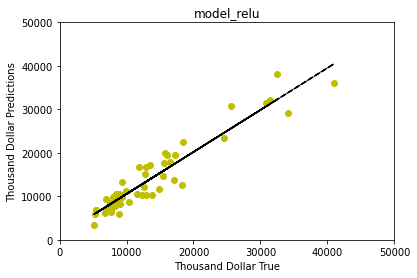

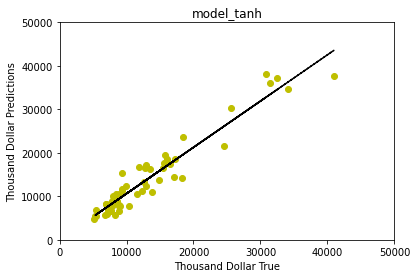

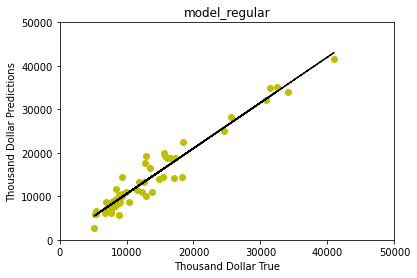

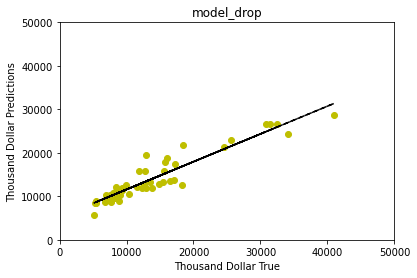

In [62]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))